# Popularity of Hearthstone Cards

Sebastian Rouse

December 7, 2018

Advanced Topics in Computer Science and Making

Isidore Newman School 

# Abstract

The Data Set: This data set is a colection of over 346,000 decks used in the card game Hearthstone. . 

Results: Lord Godfrey, the most popular card in the dataset, has continued increase in poularity over its time of being in the game. 

Conclusion: Its hightime for a nerf

# Introduction

Research Question: What is the most popular card in Hearthstone and how has its popularity changed over time? 

Relevency: It is relevent because in hearthstone a large part of winning strategies is predicting what cards your opponent will be using, knowing the most used card and how relevent it is in the current metagame can allow for you to prepare a strategy that will not be hindered by the opponent using this card.

Data Set Background: The data set is good for answering this question because it allows for one to check the most popular card and its popularity over time, showing if the card is still relevent in the metagame.

Data set source: https://www.kaggle.com/romainvincent/history-of-hearthstone

Data Set Contents: Every row of this data set is a deck and it contains every card in the deck in the for of an ID number, the date it was made, and the type of deck(ranked, casual, single player).

Additional sources: http://hearthstoneapi.com/cards# used to show the name of the card when the card ID is given.

# Results

In [56]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
hearthstone = pd.read_csv('data.csv')

Organizing all the cards, and the dates they were put into a deck, into a two-column dataframe in order to make opperating and extracting conclusions from the cards and their dates easier.

In [57]:
def allCards(df): 
    everyCard = []
    everyDate = []
    for i in range (11, 40):
        for p in range (len(df['date'])):
            if (p%2 == 0):
                everyCard.append(df[df.columns[i]][p])
                everyDate.append(df['date'][p])
    cardsAndDates = pd.DataFrame({'everyCard': everyCard, 'everyDate': everyDate})
    return(cardsAndDates)

allCards = allCards(hearthstone)

Converting the dates to datetime and adding a column that represents the month and year of the dates, allowing for the dataset to be grouped by month and year allowing for the dataset to be more easily processed.

In [62]:
allCards['everyDate'] = pd.to_datetime(allCards.everyDate)
allCards['month_year'] = allCards['everyDate'].apply(lambda x: "%d/%d" % (x.month, x.year))

Grouping the data set by the month and year as well as the cards that occur in that month and year. This is then used to evaluate the frequency with which each card occurs in each month and year. Groupby groups the data frame by the given criteria, for example in this code allCards is grouped by month_year and Card so the resultant dataframe will have all the cards that were used on the same month and year in the same section.

In [63]:
allCards = allCards.groupby(['month_year', 'everyCard']).size().to_frame(name = 'count').reset_index()

Getting the frequency with which the most popular card in the data set occurs in every month and year. I just passed it 825 rather than setting a variable to the mode off all the cards and passing that to the functuion because if I did that it would return a data set that was empty. 

In [88]:
def getOccurance(cardID):
    arrMonth = []
    arrCount = []
    for i in range(len(allCards['everyCard'])):
        if allCards['everyCard'][i] == cardID:
            arrMonth.append(allCards['month_year'][i])
            arrCount.append(allCards['count'][i])
    arrMonth = pd.to_datetime(arrMonth)
    y = pd.DataFrame({'month_year': arrMonth, 'frequency': arrCount})
    return(y)

popularity = getOccurance(825)

This data set's dates are are timestamps, however in order to plot the popularity of lord godfrey(card ID 825) on the scatterplot, the dates must be converted to integers.

In [90]:
scatter = popularity.copy()
def numberDate(df):
    x = 0
    numberDate = []
    for i in range(len(df['month_year'])):
        x = ((df['month_year'][i].year*365) + (df['month_year'][i].month*30))
        numberDate.append(float(x/365))
    return(numberDate)

scatter['numberDate'] = numberDate(scatter)

Ploting the popularity of card 825 over time. 

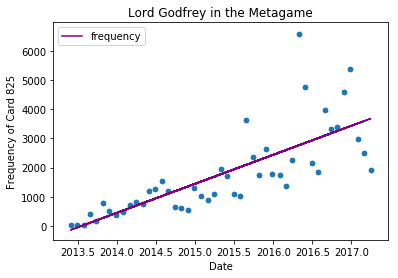

In [91]:
fit = np.polyfit(scatter.numberDate, scatter.frequency, 1)
fit_fn = np.poly1d(fit)

r_x, r_y = zip(*((i, i*fit[0] + fit[1]) for i in scatter.numberDate))

fit_plot = pd.DataFrame({
    'numberDate' : r_x,
    'frequency' : r_y
})

fig, axes = plt.subplots()
 
scatter.plot(x='numberDate', y='frequency', kind="scatter", ax = axes, title='Lord Godfrey in the Metagame')
fit_plot.plot(x='numberDate', y='frequency', kind='line', ax = axes, color = 'purple')

ax = scatter.plot(x='numberDate', y='frequency', kind="scatter", ax = axes, title='Lord Godfrey in the Metagame')

ax.set_xlabel("Date")
ax.set_ylabel("Frequency of Card 825")

plt.show()

%matplotlib inline

Slope, r squared value, and p value:

In [92]:
linregress(scatter['numberDate'], scatter['frequency']).rvalue**2

0.5891322225340001